# Decision Trees and Random Forests

# A Decision Tree in scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import graphviz


In [2]:
#loading the cleaned case study data

df = pd.read_csv("Chapter_1_cleaned_data.csv")

In [3]:
# Obtaining the column names

features_response = df.columns.tolist()

#Make a list of columns to remove

items_to_remove = ["ID","SEX","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","EDUCATION_CAT","graduate school","high school","none","others","university"]

In [4]:
# Using a list comprehension to remove these column names from our list of features and the response variable
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [5]:
# importing scikit-learn we want to make a train/test split
from sklearn.model_selection import train_test_split
from sklearn import tree


In [7]:
# splitting the data into training and testing, using the same random seed we have used previously 

X_train,X_test, y_train,y_test = train_test_split(df[features_response[:-1]].values,df["default payment next month"].values, test_size = 0.2,random_state=24)

In [8]:
# Instantiate the decision tree class by specifying the max_depth parameter to be 2

dt = tree.DecisionTreeClassifier(max_depth=2)

In [9]:
#fitting the decision tree model and growing the tree
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [10]:
# Exporting the trained model in a format that can be read by graphviz

dot_data = tree.export_graphviz(dt,out_file=None,filled=True,rounded=True,feature_names=features_response[:-1],proportion = True,class_names=["Not defaulted","Defaulted"])

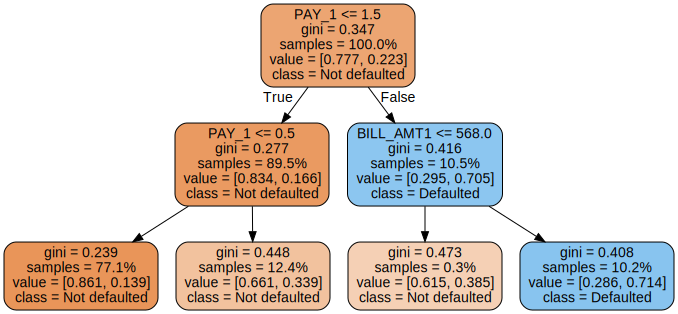

In [11]:
# using the .Source method of the graphviz package to create an image from dot_data

graph = graphviz.Source(dot_data)
graph

In [12]:
# Confirming the proportion of training samples where PAY_1 feature is less than or equal to 1.5. First id the index of this feature
features_response[:-1].index("PAY_1")

4

In [13]:
# Observe the shape of the training data

X_train.shape

(21331, 17)

In [16]:
# Confriming the proportion of samples after the first split of the decision tree

sum(X_train[:,4] <=1.5)/X_train.shape[0]

0.8946134733486475

In [17]:
# The value in the above chart is the class fraction. The very top node's value is the class fraction of the training set
# That can be obtained by 

np.mean(y_train)

0.223102526838873

# Finding Optimal Hyperparameters for a decision Tree

In [18]:
# Importing GridSearchCV class
from sklearn.model_selection import GridSearchCV


In [19]:
X_train.shape

(21331, 17)

In [20]:
# Define a dictionary with the key being the hyperparameter name and the value being the list of values 

params = {"max_depth":[1,2,4,6,8,10,12]}

In [23]:
# Instantiate theGridSearchCV class

cv = GridSearchCV(dt,param_grid=params,scoring="roc_auc",n_jobs=None,refit=True,cv=4,verbose=1,pre_dispatch=None,error_score=np.nan,return_train_score=True)

In [24]:
# Perfrom a 4-fold cross-validation to search for the optimal maximum depth

cv.fit(X_train,y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    3.9s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [25]:
# Converting the results to a dataframe 

cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.028498,0.008412,0.005503,0.004330,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.046997,0.005149,0.003752,0.001301,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,5,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.100999,0.008276,0.005005,0.001231,4,{'max_depth': 4},0.732720,0.740116,0.746946,0.743731,0.740878,0.005294,2,0.756882,0.752256,0.749368,0.753055,0.752890,0.002682
3,0.115499,0.001658,0.003501,0.000863,6,{'max_depth': 6},0.744848,0.745673,0.751281,0.740677,0.745620,0.003777,1,0.782202,0.780125,0.775228,0.774750,0.778076,0.003178
4,0.179249,0.036341,0.007252,0.002863,8,{'max_depth': 8},0.729809,0.731218,0.753025,0.730989,0.736260,0.009694,3,0.811734,0.808245,0.803415,0.802370,0.806441,0.003775
5,0.186253,0.010484,0.004247,0.001643,10,{'max_depth': 10},0.707592,0.708551,0.717230,0.710465,0.710960,0.003765,4,0.848838,0.854040,0.841216,0.836517,0.845153,0.006757
6,0.240999,0.040516,0.004500,0.001117,12,{'max_depth': 12},0.677641,0.662563,0.675001,0.676869,0.673018,0.006112,6,0.887844,0.903449,0.885502,0.876301,0.888274,0.009766


In [26]:
# Viewing the names of the remaining columns 

cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

Text(0, 0.5, 'ROC AUC')

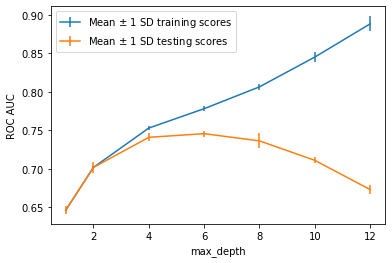

In [27]:
# Creating a error bar plot of training and testing scores for each value of max_depth

ax = plt.axes()
ax.errorbar(cv_results_df["param_max_depth"],cv_results_df["mean_train_score"],yerr=cv_results_df["std_train_score"],label="Mean $\pm$ 1 SD training scores")
ax.errorbar(cv_results_df["param_max_depth"],cv_results_df["mean_test_score"],yerr=cv_results_df["std_test_score"],label="Mean $\pm$ 1 SD testing scores")
ax.legend()
plt.xlabel("max_depth")
plt.ylabel("ROC AUC")

# Fitting a Random Forest

In [28]:
# Import the random forest classifier model

from sklearn.ensemble import RandomForestClassifier

In [29]:
# Instatiate the class using these options

rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=3,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,random_state=4, verbose=0, warm_start=False, class_weight=None)

In [30]:
# Create a parameter grid for this execerise in order to search the numbers of trees ranging from 10 to 100

rf_params_ex = {"n_estimators":list(range(10,110,10))}

In [31]:
# Instatiate a grid search cross-validation object for the random forest model using the parameter grid

cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex, scoring='roc_auc',n_jobs=None, refit=True, cv=4, verbose=1,pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [32]:
# Fit the cross-validation object
cv_rf_ex.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   33.5s finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [33]:
# Putting the cross-validation results into a dataframe

cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

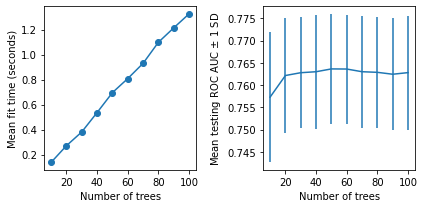

In [34]:
# Create two subplots of mean time and mean testing scores with std 

fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(6,3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],cv_rf_ex_results_df['mean_fit_time'],'-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],cv_rf_ex_results_df['mean_test_score'],yerr=cv_rf_ex_results_df['std_test_score'])
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD ')
plt.tight_layout()

In [35]:
# Obtaining the best hyperparameters from cross-validation

cv_rf_ex.best_params_

{'n_estimators': 50}

In [39]:
# Create a DataFrame of the feature names and importance show it sorted by importance
feat_imp_df = pd.DataFrame({"Feature name":features_response[:-1],"Importance":cv_rf_ex.best_estimator_.feature_importances_})
feat_imp_df.sort_values("Importance",ascending=False)

,Feature name,Importance
4,PAY_1,0.609609
11,PAY_AMT1,0.094123
0,LIMIT_BAL,0.079265
13,PAY_AMT3,0.047067
12,PAY_AMT2,0.035393
6,BILL_AMT2,0.022422
14,PAY_AMT4,0.021164
15,PAY_AMT5,0.015962
10,BILL_AMT6,0.014293
8,BILL_AMT4,0.013454
